In [1]:
import numpy as np

N = 10
eta = 0.1
num = 1000
var = 1

case = 0
for i in range(num):
    ais = np.random.normal(0,var,N)
    ais = ais ** 2
    temp = np.max(ais) + np.min(ais)
    if temp < 2/eta:
        case += 1
prob = case/num

In [2]:
def calcul_prob(N,num,eta,var):
    case = 0
    for i in range(num):
        ais = np.random.normal(0,var,N)
        ais = ais ** 2
        temp = np.max(ais) + np.min(ais)
        if temp < 2/eta:
            case += 1
    prob = case/num
    return prob

def calcul_prob_gen(N,num, eta, var, dim, batch):
    case = 0
    for i in range(num):
        hi_star = np.zeros((dim,dim))
        sigma_max = 0
        for n in range(N):
            his = np.zeros((dim,dim))
            for j in range(batch):
                ais = np.random.normal(0,var,(dim,1))
                his += ais @ ais.T / batch
            tmp_norm = np.linalg.norm(np.identity(dim) - eta * his)
            if tmp_norm >= sigma_max:
                sigma_max = tmp_norm
                hi_star = his
        eig_list = np.linalg.eig(hi_star)[0]
        eig_max = 0
        itm_max = 0
        for item in eig_list:
            tmp = np.abs(1 - eta * item)
            if tmp >= itm_max:
                eig_max = item
                itm_max = tmp
        if eig_max< (1/eta):
            case += 1
    prob = case/num
    return prob
            

def calcul_rho(N, num, eta, var, dim, batch):
#     N = 30
    tmp_list = []
    for i in range(num):
        his = np.zeros((dim,dim))
        for j in range(batch):
            ais = np.random.normal(0,var,(dim,1))
            his += ais @ ais.T / batch
        Id = np.kron(np.identity(dim), np.identity(N))
        H = np.kron( np.identity(N), his)
#         ais = np.random.normal(0,var,dim)
#         his = np.dot(ais.T, ais) / batch
#         h_list = h_list ** 2
#         H = np.diag(h_list)
        tmp_H = Id - eta * H
#         print(tmp_H)
        tmp_list.append(np.log(np.linalg.norm(tmp_H[0])))
#         print(np.log(np.linalg.det(tmp_H)))
#     print(H)
#     print(np.linalg.norm(tmp_H))
    return np.mean(tmp_list)

In [ ]:
N_list = [10,50,90]
# eta_list = np.linspace(0,0.1,10)
eta_list = np.linspace(0.4,0.6,10)
prob_list = np.zeros((len(N_list), len(eta_list)))
rho_list = np.zeros(len(eta_list))
num = 5000
var = 1
dim = 100
batch = 100

for i in range(len(N_list)):
    print(i)
    for j in range(len(eta_list)):
        N = N_list[i]
        eta = eta_list[j]
        prob_list[i][j] =2* calcul_prob_gen(N,num,eta,var, dim, batch) - 1
    rho_list[j] = calcul_rho(N, num, eta,var, dim, batch)

0
1
2


In [ ]:
rho_list

In [ ]:
N_name = []
for i in N_list:
    N_name.append('N='+str(i))
eta_name = []
for j in eta_list:
    eta_name.append(r'$\eta=$'+str(j))
import pandas as pd
df = pd.DataFrame(data = prob_list, index=N_name, columns = eta_name)
df

In [128]:
N_name = []
for i in N_list:
    N_name.append('N='+str(i))
eta_name = []
for j in eta_list:
    eta_name.append(r'$\eta=$'+str(j))
import pandas as pd
df = pd.DataFrame(data = prob_list, index=N_name, columns = eta_name)
df

,$\eta=$0.1,$\eta=$0.2,$\eta=$0.3,$\eta=$0.4,$\eta=$0.5,$\eta=$0.6,$\eta=$0.7,$\eta=$0.8,$\eta=$0.9
N=1,1.0,1.0,1.0,1.0,0.852,0.0,0.0,0.0,0.0
N=5,1.0,1.0,1.0,1.0,0.682,0.0,0.0,0.0,0.0
N=10,1.0,1.0,1.0,1.0,0.652,0.0,0.0,0.0,0.0
N=15,1.0,1.0,1.0,1.0,0.593,0.0,0.0,0.0,0.0
N=20,1.0,1.0,1.0,1.0,0.533,0.0,0.0,0.0,0.0
N=25,1.0,1.0,1.0,1.0,0.539,0.0,0.0,0.0,0.0
N=30,1.0,1.0,1.0,1.0,0.551,0.0,0.0,0.0,0.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: linewidths is ignored by contourf


<Figure size 432x288 with 0 Axes>

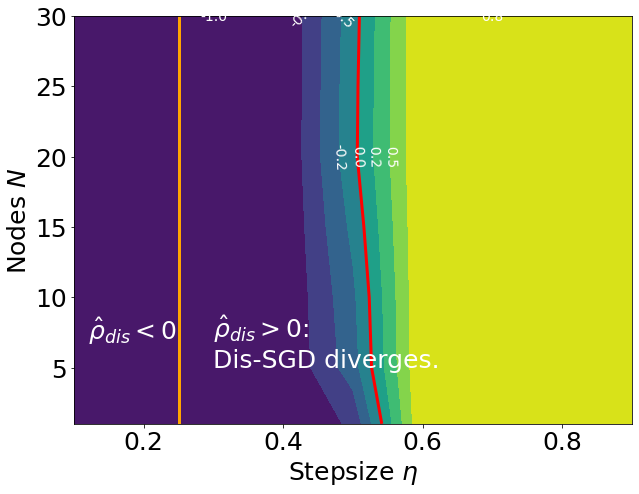

<Figure size 432x288 with 0 Axes>

In [13]:
import numpy as np
prob_list = np.array([[1.   , 1.   , 1.   , 1.   , 0.852, 0.   , 0.   , 0.   , 0.   ],
       [1.   , 1.   , 1.   , 1.   , 0.682, 0.   , 0.   , 0.   , 0.   ],
       [1.   , 1.   , 1.   , 1.   , 0.652, 0.   , 0.   , 0.   , 0.   ],
       [1.   , 1.   , 1.   , 1.   , 0.593, 0.   , 0.   , 0.   , 0.   ],
       [1.   , 1.   , 1.   , 1.   , 0.533, 0.   , 0.   , 0.   , 0.   ],
       [1.   , 1.   , 1.   , 1.   , 0.539, 0.   , 0.   , 0.   , 0.   ],
       [1.   , 1.   , 1.   , 1.   , 0.551, 0.   , 0.   , 0.   , 0.   ]])
tmp_list = np.array([-0.3279205 , -0.19344247,  0.18597807,  0.52697797,  0.79291211,
        1.0083382 ,  1.19082015,  1.34471956,  1.48283386])
rho_list = [tmp_list, tmp_list, tmp_list, tmp_list, tmp_list, tmp_list, tmp_list]
prob_list = 1-2*prob_list
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,7.5))
Y = np.array([1,5,10,15,20,25,30])
X = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# xx, yy = np.meshgrid(X, Y)
# zz = calcul_prob(xx, num, yy, var)
# fig=plt.figure(figsize=(8,8))
C = plt.contourf(X, Y, prob_list, linewidths = (2))
plt.clabel(C, fmt='%2.1f', colors='w', fontsize=14, inline = False)
plt.contour(X, Y, prob_list, [0.], colors = 'r', linewidths = (3))
plt.contour(X, Y, rho_list, [0.], colors = 'orange', linewidths = (3))
plt.xlabel(r'Stepsize $\eta$',fontsize=25)
plt.ylabel(r'Nodes $N$',fontsize=25)
plt.tick_params(labelsize=25)

plt.text(0.12, 7, r'$\hat{\rho}_{dis}<0 $', fontsize = 25, color = 'w')
plt.text(0.3, 5, r'$\hat{\rho}_{dis}>0$:'+'\n'+'Dis-SGD diverges.', fontsize = 25, color = 'w')

plt.figure()